<a href="https://colab.research.google.com/github/AlexeyUdod/mds/blob/master/mds_06_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции:
strategy, maxiter, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

#### Допзадание

Найти множество параметров (strategy=..., maxiter=..., ..., updating=...), которые требуют минимального количества итераций.

In [0]:
import numpy as np
from scipy.optimize import differential_evolution
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
strategy_list = 

In [0]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

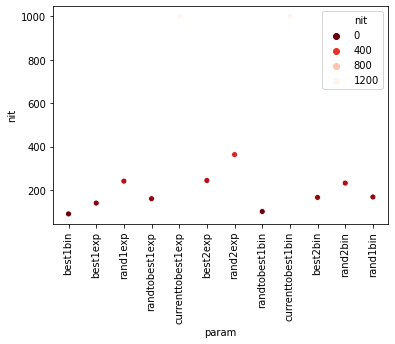

In [21]:
results = pd.DataFrame()
for strategy in ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp',
                   'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 
                   'currenttobest1bin', 'best2bin', 'rand2bin','rand1bin']:
  result = differential_evolution(ackley, bounds, seed=42, strategy=strategy)
  results = results.append({'param':strategy, 'nit':result['nit']}, ignore_index=True)
sns.scatterplot(results.param, results.nit, hue=results.nit, palette='Reds_r')
plt.xticks(rotation=90)
results[results.nit==results.nit.min()]

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 7 Text major ticklabel objects>)

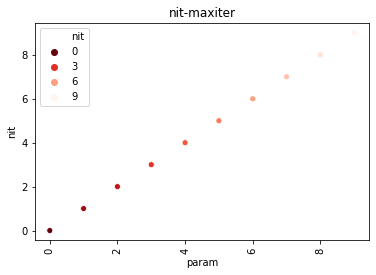

In [22]:
results = pd.DataFrame()
for param in range(10):
  result = differential_evolution(ackley, bounds, seed=42, maxiter=param)
  results = results.append({'param':param, 'nit':result['nit']}, ignore_index=True)
sns.scatterplot(results.param, results.nit, hue=results.nit, palette='Reds_r')
plt.title('nit-maxiter')
plt.xticks(rotation=90)
results[results.nit==results.nit.min()]

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 7 Text major ticklabel objects>)

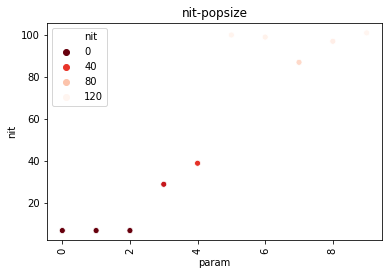

In [24]:
results = pd.DataFrame()
for param in range(10):
  result = differential_evolution(ackley, bounds, seed=42, popsize=param)
  results = results.append({'param':param, 'nit':result['nit']}, ignore_index=True)
sns.scatterplot(results.param, results.nit, hue=results.nit, palette='Reds_r')
plt.title('nit-popsize')
plt.xticks(rotation=90)
results[results.nit==results.nit.min()]

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text major ticklabel objects>)

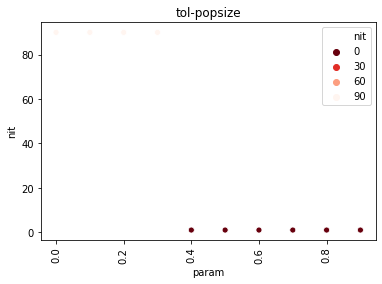

In [26]:
results = pd.DataFrame()
for param in [x/10 for x in range(10)]:
  result = differential_evolution(ackley, bounds, seed=42, tol=param)
  results = results.append({'param':param, 'nit':result['nit']}, ignore_index=True)
sns.scatterplot(results.param, results.nit, hue=results.nit, palette='Reds_r')
plt.title('tol')
plt.xticks(rotation=90)
results[results.nit==results.nit.min()]

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ]), <a list of 10 Text major ticklabel objects>)

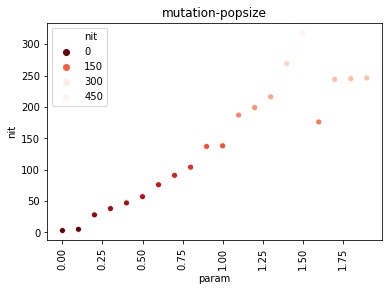

In [27]:
results = pd.DataFrame()
for param in [x/10 for x in range(20)]:
  result = differential_evolution(ackley, bounds, seed=42, mutation=param)
  results = results.append({'param':param, 'nit':result['nit']}, ignore_index=True)
sns.scatterplot(results.param, results.nit, hue=results.nit, palette='Reds_r')
plt.title('mutation')
plt.xticks(rotation=90)
results[results.nit==results.nit.min()]

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text major ticklabel objects>)

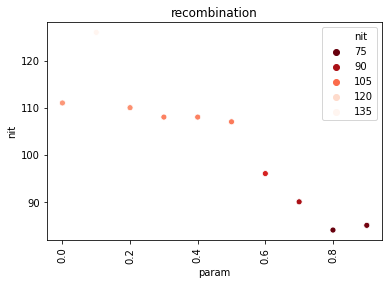

In [28]:
results = pd.DataFrame()
for param in [x/10 for x in range(10)]:
  result = differential_evolution(ackley, bounds, seed=42, recombination=param)
  results = results.append({'param':param, 'nit':result['nit']}, ignore_index=True)
sns.scatterplot(results.param, results.nit, hue=results.nit, palette='Reds_r')
plt.title('recombination')
plt.xticks(rotation=90)
results[results.nit==results.nit.min()]

([0, 1], <a list of 2 Text major ticklabel objects>)

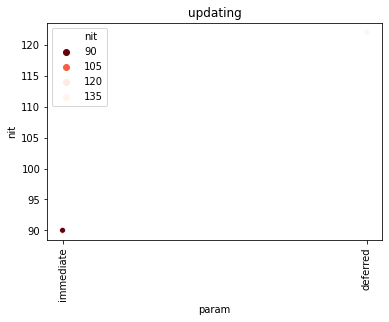

In [29]:
results = pd.DataFrame()
for param in ['immediate', 'deferred']:
  result = differential_evolution(ackley, bounds, seed=42, updating=param)
  results = results.append({'param':param, 'nit':result['nit']}, ignore_index=True)
sns.scatterplot(results.param, results.nit, hue=results.nit, palette='Reds_r')
plt.title('updating')
plt.xticks(rotation=90)
results[results.nit==results.nit.min()]

In [49]:
result = differential_evolution(ackley, bounds, seed=42,
                                maxiter=1,
                                popsize=2,
                                tol=0.4,
                                mutation=0,
                                recombination=0.8,
                                updating='immediate')
result

     fun: 7.038850555686631
 message: 'Optimization terminated successfully.'
    nfev: 268
     nit: 1
 success: True
       x: array([-1.37592544, -1.37602192])

Формально, согласно заданию, этот вариант является самым быстрым (всего одна иттерация), но его точность очень невысока.

In [0]:
param_list = {'strategy_list':['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp',
                   'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 
                   'currenttobest1bin', 'best2bin', 'rand2bin','rand1bin'],
              'maxiter':range(10), 
'popsize':range(1,100), 'tol':[x/100 for x in range(100)],
'mutation' : [x/100 for x in range(200)],
'recombination' : [x/100 for x in range(100)],
'updating' : ['immediate', 'deferred']}
